In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
import scipy
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,RocCurveDisplay,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from  sklearn.preprocessing import MinMaxScaler
data=pd.read_csv("D:/jajroudi PH.D/other project/physiotherapy/revized data.csv")
#print("check for null",data.isnull().sum())
#print(data.columns)
#data.info()
data["GS"].head()

0    pfps
1    pfps
2    pfps
3    pfps
4    pfps
Name: GS, dtype: object

In [2]:
def PLOT_PRE_count(data_in):
    
    Columns=[ 'Sex', 'Painfulknee', 'DLL', 'Palpation',
    'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST',"GS"]
    plt.rcParams["figure.figsize"] = [10, 20]
    plt.rcParams["figure.autolayout"] = True
    f, axes = plt.subplots(4, 2)
    i=0
    for column in Columns :
    #sns.catplot(data=data, x=column, hue="CMPIE Status" , kind="count",ax=axes[i])
        sns_plot=sns.countplot(data=data_in,x=data[column].sort_values(), palette=sns.color_palette("Set2"), hue=data_in["GS" ],ax=axes[i//2,i%2]).set_title(f' Distribution of {column}')
        i=i+1

In [3]:
def PLOT_PRE_HIST(data_in):
    Columns=['Age', 'BMI',  'Pain','Time',
        'Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting']
    plt.rcParams["figure.figsize"] = [10, 20]
    plt.rcParams["figure.autolayout"] = True
    f, axes = plt.subplots(7, 2)
    i=0
    for column in Columns:
   
        sns_plot=sns.histplot(data=data,x=data_in[column].sort_values(), palette=sns.color_palette("Set2"), hue=data_in["GS" ],ax=axes[i//2,i%2],kde=True).set_title(f' Distribution of {column}')
  
        i=i+1

C:\Users\JajroudiMH991\AppData\Local\Temp\ipykernel_23364\3668490182.py:12: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns_plot=sns.histplot(data=data,x=data_in[column].sort_values(), palette=sns.color_palette("Set2"), hue=data_in["GS" ],ax=axes[i//2,i%2],kde=True).set_title(f' Distribution of {column}')
C:\Users\JajroudiMH991\AppData\Local\Temp\ipykernel_23364\3668490182.py:12: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns_plot=sns.histplot(data=data,x=data_in[column].sort_values(), palette=sns.color_palette("Set2"), hue=data_in["GS" ],ax=axes[i//2,i%2],kde=True).set_title(f' Distribution of {column}')
C:\Users\JajroudiMH991\AppData\Local\Temp\ipykernel_23364\3668490182.py:12: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns_plot=sns.histplot(data=data,x=data_in[column].sort_values(), palette=sns.color_palette("Set2"), hue=data_i

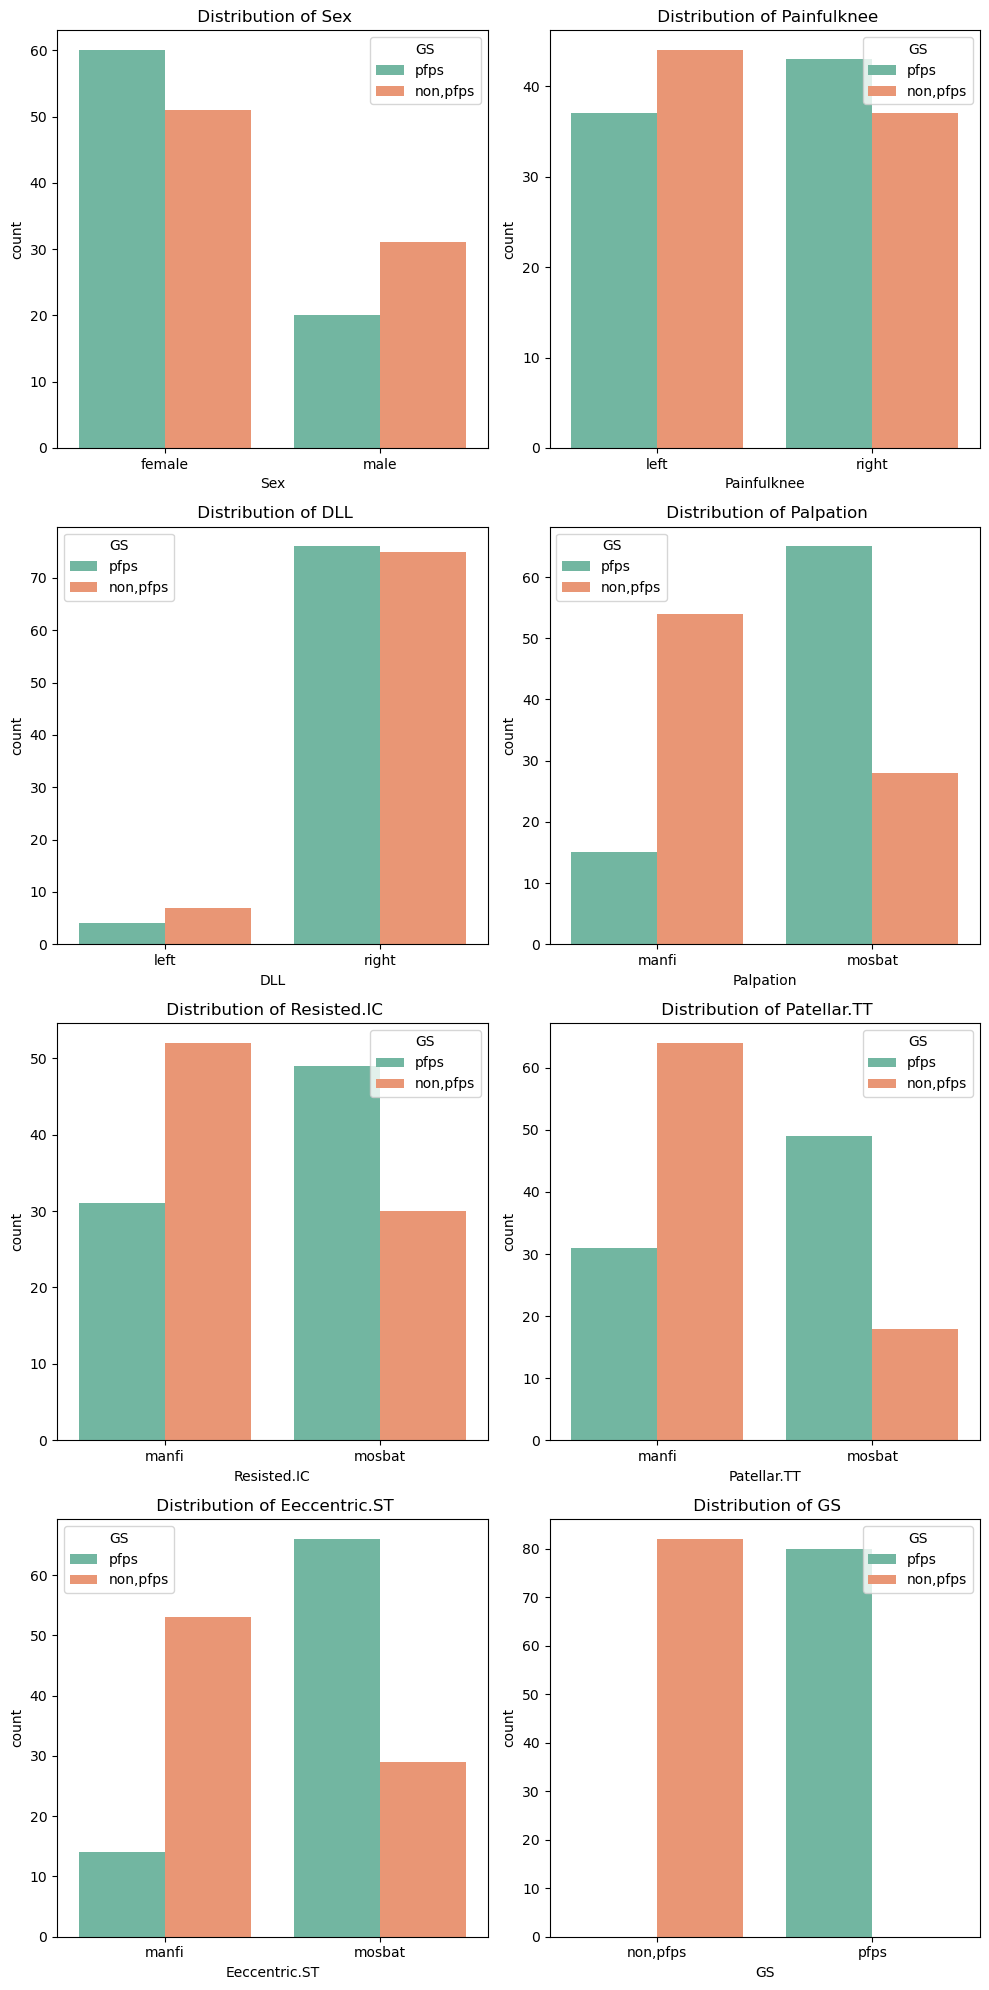

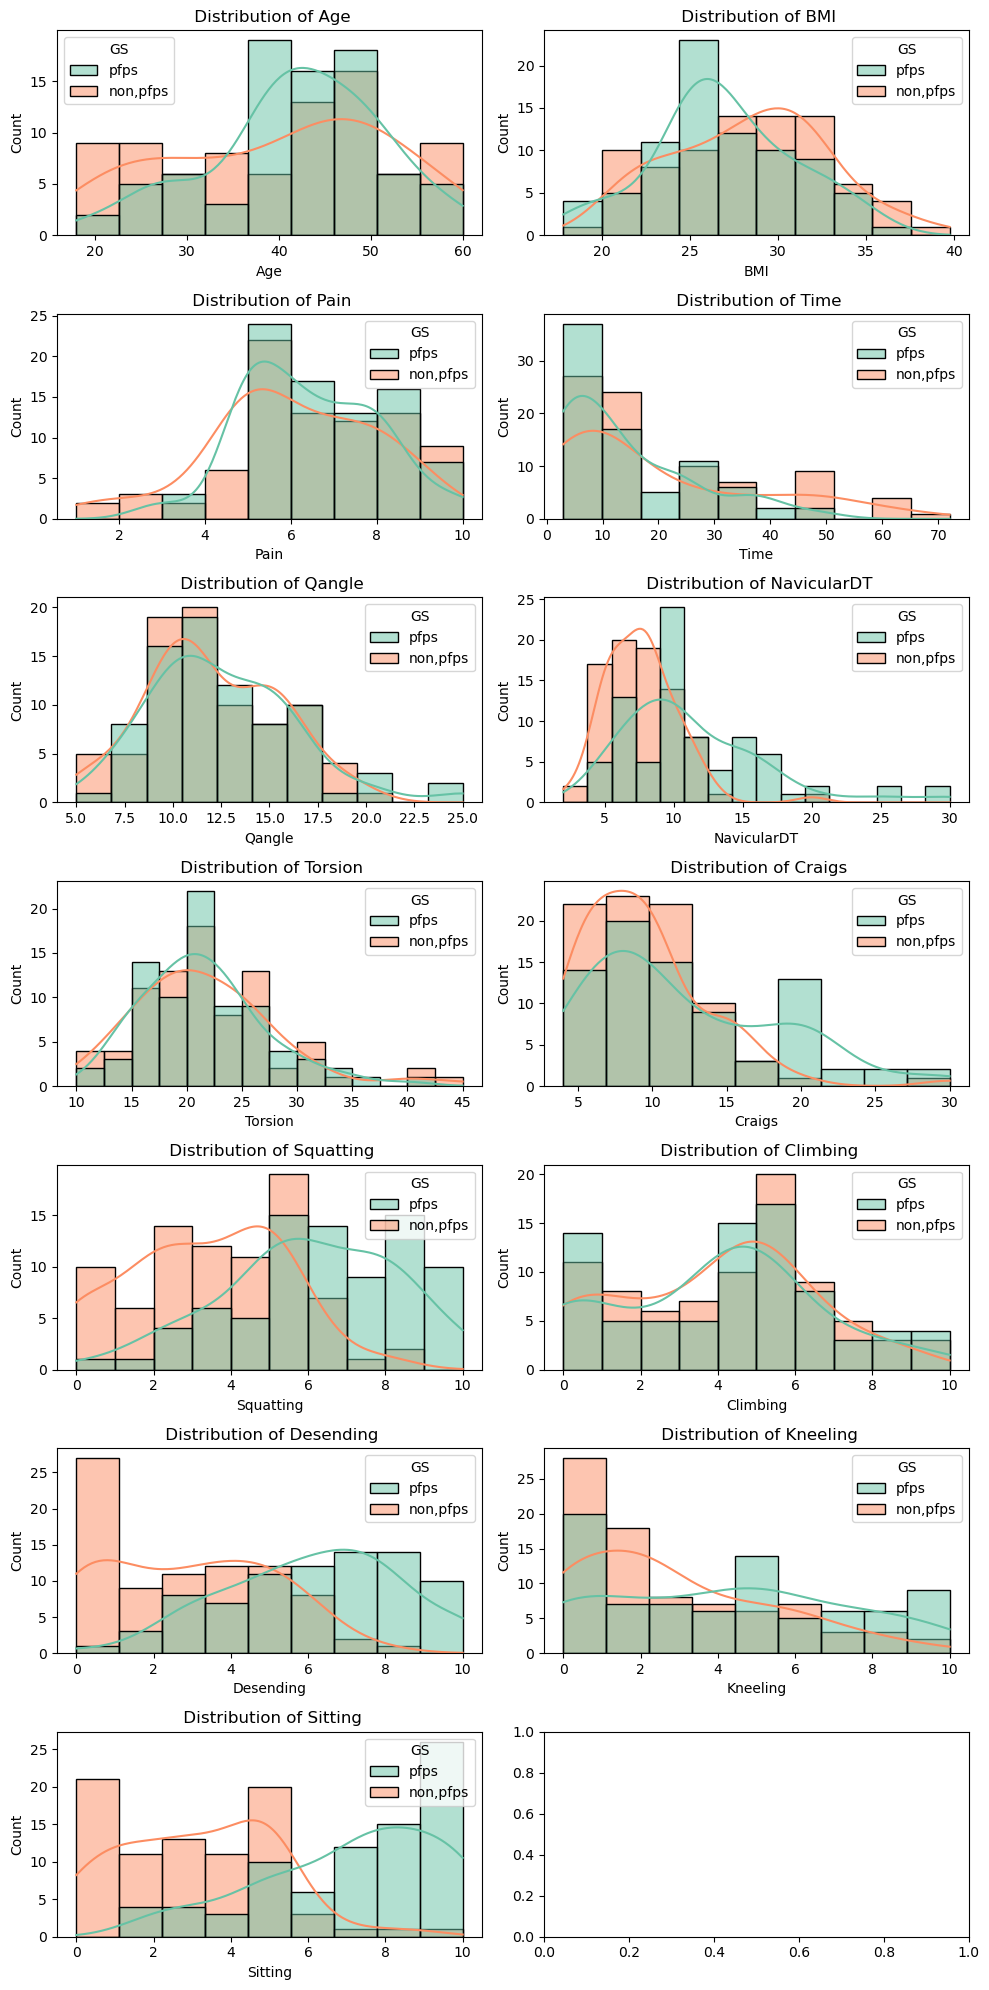

In [4]:
PLOT_PRE_count(data)
PLOT_PRE_HIST(data)

In [5]:
from scipy.stats import kstest
Columns=['Age', 'BMI','Pain', 'Time',
        'Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting']
datapfn=data[data["GS"]=="non,pfps"]
for i in Columns:
    print([i])
    stat,P=kstest(datapfn[i],"norm")
    print('Statistics=%.3f, p=%.3f' % (stat, P))
    alpha = 0.05
    if P > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

['Age']
Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)
['BMI']
Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)
['Pain']
Statistics=0.953, p=0.000
Sample does not look Gaussian (reject H0)
['Time']
Statistics=0.999, p=0.000
Sample does not look Gaussian (reject H0)
['Qangle']
Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)
['NavicularDT']
Statistics=0.986, p=0.000
Sample does not look Gaussian (reject H0)
['Torsion']
Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)
['Craigs']
Statistics=1.000, p=0.000
Sample does not look Gaussian (reject H0)
['Squatting']
Statistics=0.782, p=0.000
Sample does not look Gaussian (reject H0)
['Climbing']
Statistics=0.746, p=0.000
Sample does not look Gaussian (reject H0)
['Desending']
Statistics=0.658, p=0.000
Sample does not look Gaussian (reject H0)
['Kneeling']
Statistics=0.636, p=0.000
Sample does not look Gaussian (reject H0)
['Sitting']
Statistics=0.732, p=0.000
Sample d

In [6]:
from scipy.stats import kstest
Columns=['Age', 'BMI','Pain', 'Time',
        'Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting']
datapf=data[data["GS"]=="pfps"]
for i in Columns:
    print([i])
    stat,P=kstest(datapf[i],"norm")
    print('Statistics=%.3f, p=%.3f' % (stat, P))
    alpha = 0.05
    if P > alpha:
        print('Sample looks Gaussian (Accept H0)')
    else:
        print('Sample does not look Gaussian (Reject H0)')


['Age']
Statistics=1.000, p=0.000
Sample does not look Gaussian (Reject H0)
['BMI']
Statistics=1.000, p=0.000
Sample does not look Gaussian (Reject H0)
['Pain']
Statistics=0.999, p=0.000
Sample does not look Gaussian (Reject H0)
['Time']
Statistics=0.999, p=0.000
Sample does not look Gaussian (Reject H0)
['Qangle']
Statistics=1.000, p=0.000
Sample does not look Gaussian (Reject H0)
['NavicularDT']
Statistics=1.000, p=0.000
Sample does not look Gaussian (Reject H0)
['Torsion']
Statistics=1.000, p=0.000
Sample does not look Gaussian (Reject H0)
['Craigs']
Statistics=1.000, p=0.000
Sample does not look Gaussian (Reject H0)
['Squatting']
Statistics=0.952, p=0.000
Sample does not look Gaussian (Reject H0)
['Climbing']
Statistics=0.740, p=0.000
Sample does not look Gaussian (Reject H0)
['Desending']
Statistics=0.965, p=0.000
Sample does not look Gaussian (Reject H0)
['Kneeling']
Statistics=0.727, p=0.000
Sample does not look Gaussian (Reject H0)
['Sitting']
Statistics=0.977, p=0.000
Sample d

In [7]:
from scipy.stats import mannwhitneyu
Columns=['Age', 'BMI','Pain', 'Time',
        'Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting']
datapf=data[data["GS"]=="pfps"]
datapfn=data[data["GS"]=="non,pfps"]
for i in Columns:
    print([i])
    stat,P=mannwhitneyu(datapf[i],datapfn[i],method="exact")
    print('Statistics=%.3f, p=%.3f' % (stat, P))
    alpha = 0.05
    if P > alpha:
        print('No significant relation (Accept  H0)')
    else:
        print('significant relation  (Reject H0)')


['Age']
Statistics=3527.500, p=0.410
No significant relation (Accept  H0)
['BMI']
Statistics=2687.000, p=0.047
significant relation  (Reject H0)
['Pain']
Statistics=3614.500, p=0.265
No significant relation (Accept  H0)
['Time']
Statistics=2774.500, p=0.091
No significant relation (Accept  H0)
['Qangle']
Statistics=3475.500, p=0.516
No significant relation (Accept  H0)
['NavicularDT']
Statistics=4881.000, p=0.000
significant relation  (Reject H0)
['Torsion']
Statistics=3276.500, p=0.993
No significant relation (Accept  H0)
['Craigs']
Statistics=4036.500, p=0.011
significant relation  (Reject H0)
['Squatting']
Statistics=5308.500, p=0.000
significant relation  (Reject H0)
['Climbing']
Statistics=3231.000, p=0.871
No significant relation (Accept  H0)
['Desending']
Statistics=5501.000, p=0.000
significant relation  (Reject H0)
['Kneeling']
Statistics=4105.000, p=0.006
significant relation  (Reject H0)
['Sitting']
Statistics=5824.000, p=0.000
significant relation  (Reject H0)


In [8]:
from scipy.stats import chi2_contingency
Columns=[ 'Sex', 'Painfulknee', 'DLL', 'Palpation',
       'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST',"GS"]
results = {}
for col in Columns:
    print([col])
    contingency_table = pd.crosstab(data[col], data["GS"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results[col] = {"Test Statistic": chi2, "p-value": p}
    print('Statistics=%.3f, p=%.3f' % (chi2, p))
    alpha = 0.05
    if p > alpha:
        print('No significant relation (Accept  H0)')
    else:
        print('  significant relation(reject H0)')

['Sex']
Statistics=2.513, p=0.113
No significant relation (Accept  H0)
['Painfulknee']
Statistics=0.751, p=0.386
No significant relation (Accept  H0)
['DLL']
Statistics=0.339, p=0.560
No significant relation (Accept  H0)
['Palpation']
Statistics=34.844, p=0.000
  significant relation(reject H0)
['Resisted.IC']
Statistics=8.897, p=0.003
  significant relation(reject H0)
['Patellar.TT']
Statistics=24.191, p=0.000
  significant relation(reject H0)
['Eeccentric.ST']
Statistics=35.175, p=0.000
  significant relation(reject H0)
['GS']
Statistics=158.024, p=0.000
  significant relation(reject H0)


####SPLITTINGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG

In [9]:
encoder=OneHotEncoder(sparse=False,drop="first") # two state one state drop
Columns=[ 'Sex', 'Palpation',
       'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST','Age', 'BMI','Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting',"GS"]
results = {}
data_for_T_T=data[[ 'Sex', 'Palpation',
       'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST','Age', 'BMI','Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting',"GS"]]
data_features=data_for_T_T.iloc[:,:-1]
data_features_v=data_features.values
data_tar=data_for_T_T.iloc[:,-1]
data_tar_v=data_tar.values
df_train_X, df_test_X ,df_train_Y,df_test_Y= train_test_split(data_features_v,data_tar_v, test_size=0.2, random_state=42, shuffle=True)
data_features_v.shape

(162, 16)

ONE HOT encodinggggggggggggggggggggggg for Trainning

In [10]:
encoder = OneHotEncoder(drop="first")

one_hot_encoded=encoder.fit_transform(df_train_Y.reshape(-1,1)).toarray()

data_train_Y1=pd.DataFrame(one_hot_encoded,columns=[ "GS" ])
data_train_Y1

,GS
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0
...,...
124,1.0
125,0.0
126,1.0
127,0.0


In [11]:
encoder = OneHotEncoder(drop="first")
one_hot_encoded=encoder.fit_transform(df_train_X[:,0:5]).toarray()
newcol=encoder.get_feature_names_out ()

data_train_X1=pd.DataFrame(one_hot_encoded,columns=[ 'Sex', 'Palpation',
       'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST'])
data_train_X1.shape

(129, 5)

###ONE HOT encodinggggggggggggggggggggggg for TEST

In [12]:
encoder = OneHotEncoder(drop="first")

one_hot_encoded=encoder.fit_transform(df_test_Y.reshape(-1,1)).toarray()

data_test_Y1=pd.DataFrame(one_hot_encoded,columns=[ "GS" ])

In [13]:
encoder = OneHotEncoder(drop="first")
one_hot_encoded=encoder.fit_transform(df_test_X[:,0:5]).toarray()
newcol=encoder.get_feature_names_out ()

data_test_X1=pd.DataFrame(one_hot_encoded,columns=[ 'Sex', 'Palpation',
       'Resisted.IC', 'Patellar.TT', 'Eeccentric.ST'])

NORMALIZZZZZZZZZZZZZZZZZZZZZZZZEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE           for  trainning and test 

In [14]:

data_quan=data[['Age', 'BMI','Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting']]
newcol=['Age', 'BMI','Qangle', 'NavicularDT',
       'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
       'Sitting']

modelSc =  MinMaxScaler()
df= modelSc.fit(df_train_X[:,5:16])
dfX=modelSc.transform(df_train_X[:,5:16])
dfXT=modelSc.transform(df_test_X[:,5:16])
#x=np.concatenate((dfX,dfXT))
modelSc.get_feature_names_out()

data_train_X2=pd.DataFrame(dfX,columns=['Age', 'BMI','Qangle', 'NavicularDT',
     'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
      'Sitting'])

data_test_X2=pd.DataFrame(dfXT,columns=['Age', 'BMI','Qangle', 'NavicularDT',
     'Torsion', 'Craigs', 'Squatting', 'Climbing', 'Desending', 'Kneeling',
      'Sitting'])
data_train_X2.shape

(129, 11)

####MODELING

In [15]:
result_train=pd.concat([data_train_X1, data_train_X2,data_train_Y1], axis=1)
result_test=pd.concat([data_test_X1, data_test_X2,data_test_Y1], axis=1)
###### training Class 
result_train["GS"].value_counts()
result_train.shape

(129, 17)

##### Confusion MATRIX

In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix,auc
import seaborn as sns
from sklearn.metrics import  ConfusionMatrixDisplay,RocCurveDisplay
def measure_critaria(best_model,x,y):
    y_pred = best_model.predict(x)
    accuracy= accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    tn_, fp_, fn_, tp_ = confusion_matrix(y, y_pred).ravel()
    
    specificity = tn_ / (tn_ + fp_)
    sensitivity = tp_ / (tp_ + fn_)
    auc1 = roc_auc_score(y, y_pred)
    print("Test set metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 score:", f1)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    print("AUC:", auc1)
    cm = confusion_matrix(y, y_pred, labels=best_model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=np.transpose(cm),
                            display_labels=best_model.classes_)
    disp.plot()
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize=(2, 2))
    plt.show()
    
    RocCurveDisplay.from_predictions(y, y_pred)
    plt.plot(fp_, tp_, color='darkorange', label='ROC curve (area = %0.2f)' % auc1)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for outer')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.legend(loc="lower right")
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize=(2, 2))
    plt.show()
#plt.savefig(address+"auc__smote_stacking.png", dpi=300, bbox_inches="tight")


###### Learning Curve

In [17]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
# X and y are the input features and labels of training set, respectively
# model is the classification model to be trained
def LearningCurve(best_model,x,y,n):
    
    train_sizes, train_scores, test_scores = learning_curve(best_model,x,y, cv=n)
    # Calculate mean and standard deviation of train and test scores across CV folds
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    # Plot the learning curve
    plt.plot(train_sizes, train_mean, label='Train')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Validation')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.rcParams["figure.figsize"] = [5, 5]
    plt.rcParams["figure.autolayout"] = True
    plt.figure(figsize=(2, 2))
    plt.show()

#### Calibration Curve 

In [18]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
#y_true is the true labels for the test set, and y_probs is the predicted probabilities
#y_true = Y_test_f# true labels for test set
def Calibration_Curve(best_model,X_test_f,Y_test_f):
     y_pred = best_model.predict(X_test_f)
     y_probs = y_pred # predicted probabilities for test set
# # # Calculate calibration curve
     frac_pos, mean_pred = calibration_curve(Y_test_f, y_probs, n_bins=10)
# # # Plot calibration curve
     plt.plot(mean_pred, frac_pos, marker='o', linewidth=1, label='Model')
     plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
     plt.xlabel('Mean predicted probability')
     plt.ylabel('Fraction of positive samples')
     plt.rcParams["figure.figsize"] = [5, 5]
     plt.rcParams["figure.autolayout"] = True
     plt.figure(figsize=(2, 2))
     #plt.legend()
     plt.show()

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
X_train_f=result_train.iloc[:,:-1].values
col_feature=result_train.iloc[:,:-1].columns
Y_train_f=result_train["GS"].values
name_features = {}

# Loop through the columns in the DataFrame
for col in col_feature:
    # Check if the column is categorical
    if result_train[col].dtype == 'object':
        # Store the unique values in the dictionary
        name_features[col] = list(X[col].unique())
        
model = SVC()
hyperparameters = { "C": [0.1, 10 ,20,50,100], "gamma": [ 0.01,0.1,0.2,0.3], 'kernel': [ 'linear','rbf']}
### model.set_feature_names(list(col_feature))
###  loop for outer
outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf=GridSearchCV(estimator=model, param_grid=hyperparameters, cv=inner_cv, scoring='roc_auc')
clf.fit(X_train_f,Y_train_f )
#best_model.set_feature_names(list(X.columns))
# Fit the model to the data
#best_model.fit(X, y, cat_features=list(cat_features.keys()))
best_modelSVM=clf.best_estimator_
best_modelSVM=SVC(C=clf.best_estimator_.C,gamma=clf.best_estimator_.gamma,kernel=clf.best_estimator_.kernel)
best_modelSVM.fit(X_train_f,Y_train_f )
best_modelSVM

SVC(C=10, gamma=0.01, kernel='linear')

In [20]:
scores = cross_val_score(best_modelSVM, X_train_f,Y_train_f, cv=outer_cv, scoring='roc_auc')
print("Nested Cross-Validation Scores:")
print(np.mean(scores))

Nested Cross-Validation Scores:
0.9630952380952381


FORRRRRRRRRRRRRRRRRRRRR TEEEEEEEEESSSTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT

Test set metrics:
Accuracy: 0.9393939393939394
Precision: 0.9411764705882353
Recall: 0.9411764705882353
F1 score: 0.9411764705882353
Sensitivity: 0.9411764705882353
Specificity: 0.9375
AUC: 0.9393382352941176


<Figure size 200x200 with 0 Axes>

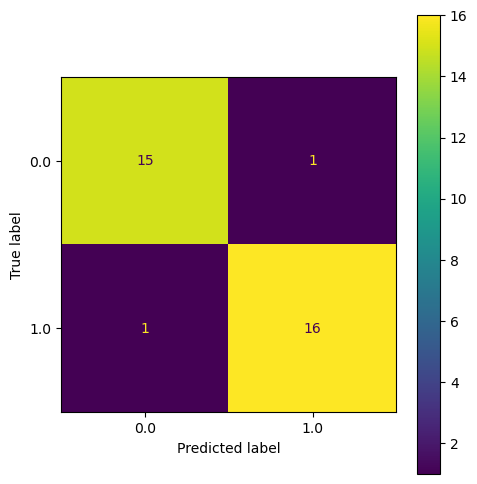

<Figure size 200x200 with 0 Axes>

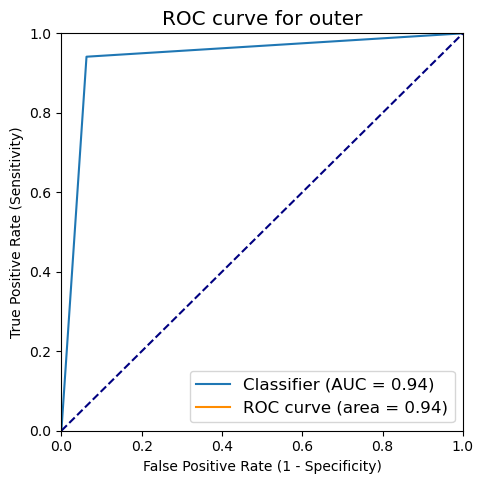

<Figure size 200x200 with 0 Axes>

In [21]:
X_test_f=result_test.iloc[:,:-1].values
Y_test_f=result_test["GS"].values
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(2, 2))
measure_critaria(best_modelSVM,X_test_f,Y_test_f)

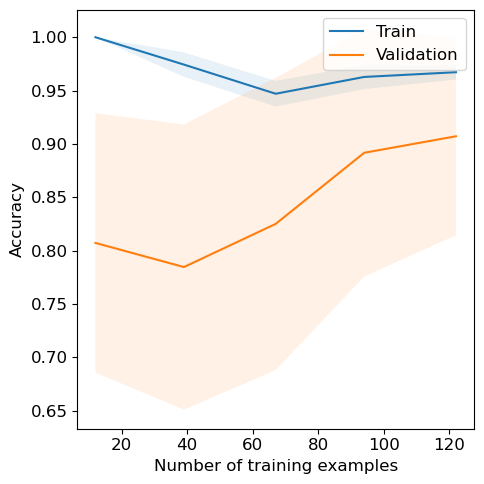

<Figure size 200x200 with 0 Axes>

In [22]:
LearningCurve(best_modelSVM,X_train_f,Y_train_f,20)

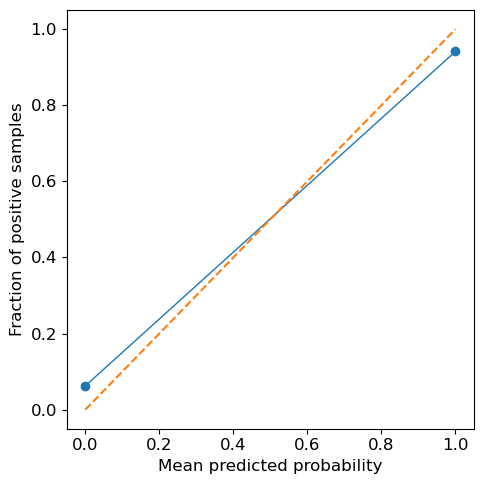

<Figure size 200x200 with 0 Axes>

In [23]:
Calibration_Curve(best_modelSVM,X_test_f,Y_test_f)

### DecisionTreeClassifier

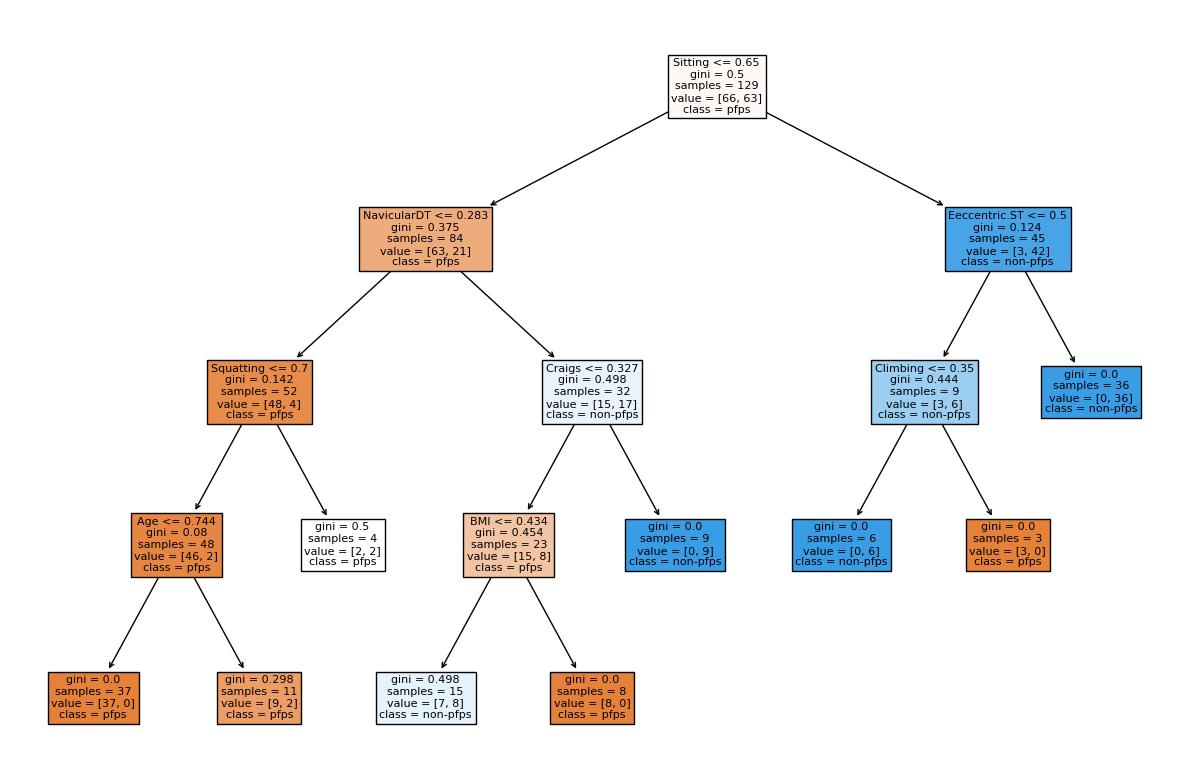

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
X_train_f=result_train.iloc[:,:-1].values
col_feature=result_train.iloc[:,:-1].columns
Y_train_f=result_train["GS"].values

model = DecisionTreeClassifier()
hyperparameters = { "criterion": ["gini", "entropy", "log_loss"], "max_depth": [4,5,6], 'min_samples_leaf': [1,3],
                  "splitter" : ["best", "random"]}
# # ### model.set_feature_names(list(col_feature))
# # ###  loop for outer
outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf=GridSearchCV(estimator=model, param_grid=hyperparameters, cv=inner_cv, scoring='roc_auc')
clf.fit(X_train_f,Y_train_f )

# # # Fit the model to the data

best_modelDT=clf.best_estimator_
best_modelDT=DecisionTreeClassifier(criterion=clf.best_estimator_.criterion,max_depth=clf.best_estimator_.max_depth,min_samples_leaf=clf.best_estimator_.min_samples_leaf)
best_modelDT.fit(X_train_f,Y_train_f )
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(12, 8))
tree.plot_tree(best_modelDT,filled=True,feature_names=list(col_feature),class_names = ["pfps","non-pfps"])
plt.show()


Nested Cross-Validation Scores:
0.8636904761904762
Test set metrics:
Accuracy: 0.8787878787878788
Precision: 0.9333333333333333
Recall: 0.8235294117647058
F1 score: 0.8749999999999999
Sensitivity: 0.8235294117647058
Specificity: 0.9375
AUC: 0.8805147058823529


<Figure size 200x200 with 0 Axes>

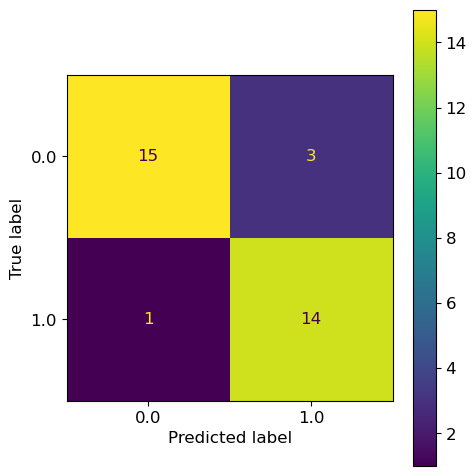

<Figure size 200x200 with 0 Axes>

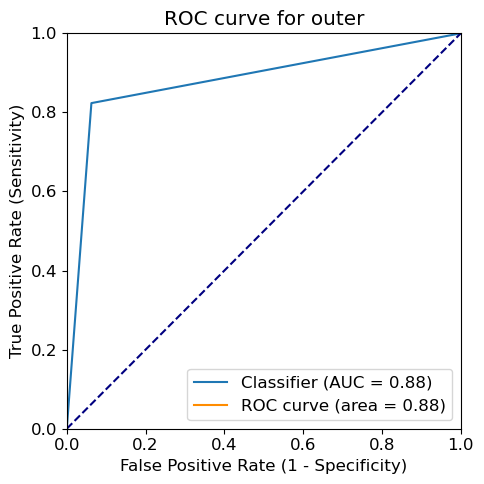

<Figure size 200x200 with 0 Axes>

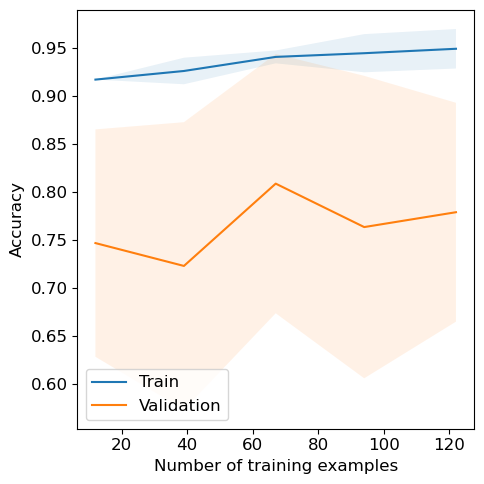

<Figure size 200x200 with 0 Axes>

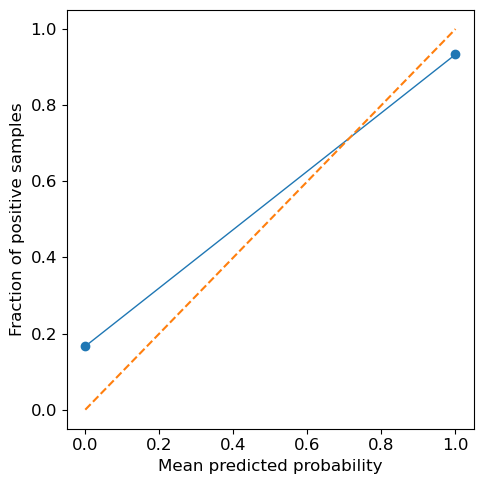

<Figure size 200x200 with 0 Axes>

In [25]:
scores = cross_val_score(best_modelDT, X_train_f,Y_train_f, cv=outer_cv, scoring='roc_auc')
print("Nested Cross-Validation Scores:")
print(np.mean(scores))
X_test_f=result_test.iloc[:,:-1].values
Y_test_f=result_test["GS"].values
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(2, 2))
measure_critaria(best_modelDT,X_test_f,Y_test_f)
LearningCurve(best_modelDT,X_train_f,Y_train_f,20)
Calibration_Curve(best_modelDT,X_test_f,Y_test_f)

#### MLPClassifier

In [87]:
#### from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
X_train_f=result_train.iloc[:,:-1].values
col_feature=result_train.iloc[:,:-1].columns
Y_train_f=result_train["GS"].values

#modelMP = MLPClassifier(max_iter=4000,solver="adam",learning_rate="adaptive",learning_rate_init=0.1,hidden_layer_sizes=10,alpha=0.0007)
                #   ,"solver":["lbfgs", "sgd", "adam"]}
modelMP = MLPClassifier(max_iter=4000,solver="adam",learning_rate="adaptive",learning_rate_init=0.05,hidden_layer_sizes=(12,7,3,),alpha=0.0050)                   

# # # ###  loop for outer
# outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)
# inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
# clf=GridSearchCV(estimator=model, param_grid=hyperparameters, cv=inner_cv, scoring='roc_auc')
# clf.fit(X_train_f,Y_train_f )

# # # # # Fit the model to the data

# best_modelMP=clf.best_estimator_
# best_modelMP=MLPClassifier(activation=clf.best_estimator_.activation,hidden_layer_sizes=clf.best_estimator_.hidden_layer_sizes,max_iter=4000
#                         ,learning_rate_init=0.1,momentum=0.1)
modelMP.fit(X_train_f,Y_train_f )
# plt.rcParams["figure.figsize"] = [10, 10]
# plt.rcParams["figure.autolayout"] = True
# plt.figure(figsize=(12, 8))
# tree.plot_tree(best_model,filled=True,feature_names=list(col_feature),class_names = ["pfps","non-pfps"])
# plt.show()

MLPClassifier(alpha=0.005, hidden_layer_sizes=(12, 7, 3),
              learning_rate='adaptive', learning_rate_init=0.05, max_iter=4000)

Nested Cross-Validation Scores:
0.8932539682539684
Test set metrics:
Accuracy: 0.9090909090909091
Precision: 0.8888888888888888
Recall: 0.9411764705882353
F1 score: 0.9142857142857143
Sensitivity: 0.9411764705882353
Specificity: 0.875
AUC: 0.9080882352941176


<Figure size 200x200 with 0 Axes>

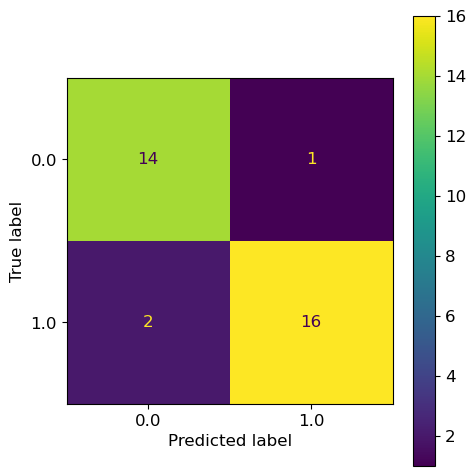

<Figure size 200x200 with 0 Axes>

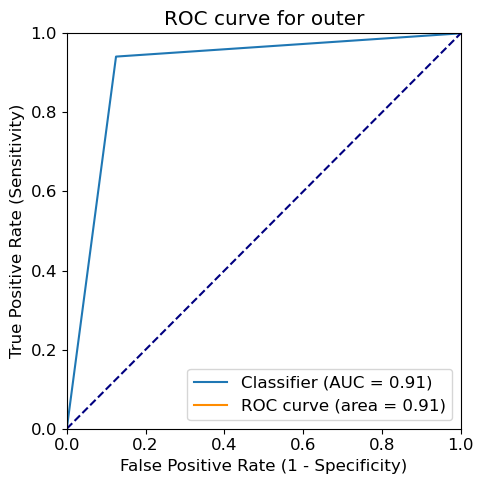

<Figure size 200x200 with 0 Axes>

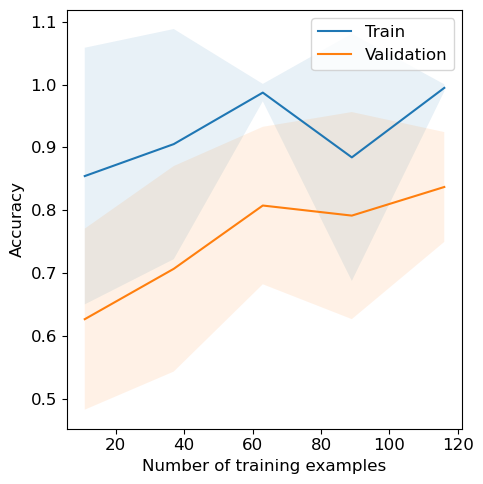

<Figure size 200x200 with 0 Axes>

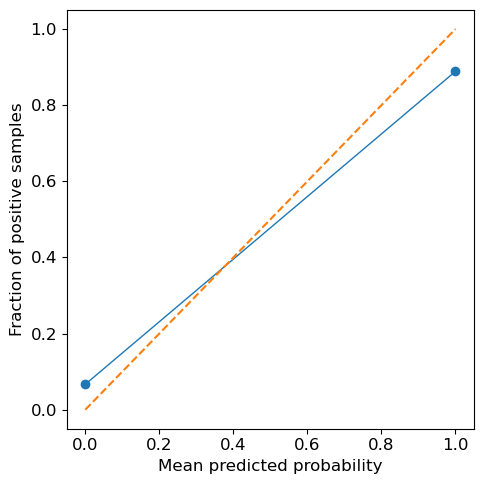

<Figure size 200x200 with 0 Axes>

In [88]:

outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)
scores = cross_val_score(modelMP, X_train_f,Y_train_f, cv=outer_cv, scoring='roc_auc')
print("Nested Cross-Validation Scores:")
print(np.mean(scores))
X_test_f=result_test.iloc[:,:-1].values
Y_test_f=result_test["GS"].values
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(2, 2))
measure_critaria(modelMP,X_test_f,Y_test_f)
LearningCurve(modelMP,X_train_f,Y_train_f,10)
Calibration_Curve(modelMP,X_test_f,Y_test_f)

##### GaussianNB

In [28]:
from sklearn.naive_bayes import GaussianNB
X_train_f=result_train.iloc[:,:-1].values
col_feature=result_train.iloc[:,:-1].columns
Y_train_f=result_train["GS"].values

modelNB = GaussianNB(priors=[0.5,0.50])
hyperparameters = { "var_smoothing": [1.6,1.61,1.62,1.63,1.64,1.67,1.69] }
# # ###  loop for outer
outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf=GridSearchCV(estimator=modelNB, param_grid=hyperparameters, cv=inner_cv, scoring='roc_auc')
clf.fit(X_train_f,Y_train_f )

# # # Fit the model to the data

best_modelNB=clf.best_estimator_
best_modelNB=GaussianNB(var_smoothing=clf.best_estimator_.var_smoothing,priors=[0.7,0.3])
best_modelNB.fit(X_train_f,Y_train_f )



GaussianNB(priors=[0.7, 0.3], var_smoothing=1.6)

Nested Cross-Validation Scores:
0.925
Test set metrics:
Accuracy: 0.9090909090909091
Precision: 0.9375
Recall: 0.8823529411764706
F1 score: 0.9090909090909091
Sensitivity: 0.8823529411764706
Specificity: 0.9375
AUC: 0.9099264705882353


<Figure size 200x200 with 0 Axes>

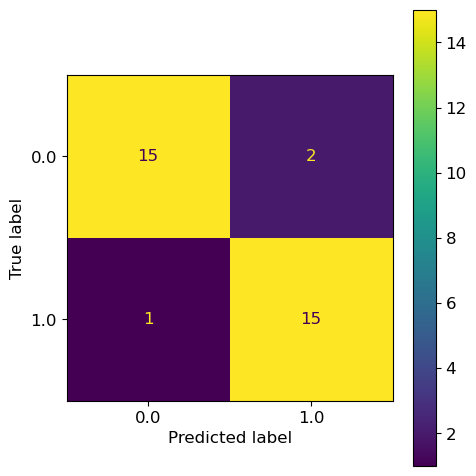

<Figure size 200x200 with 0 Axes>

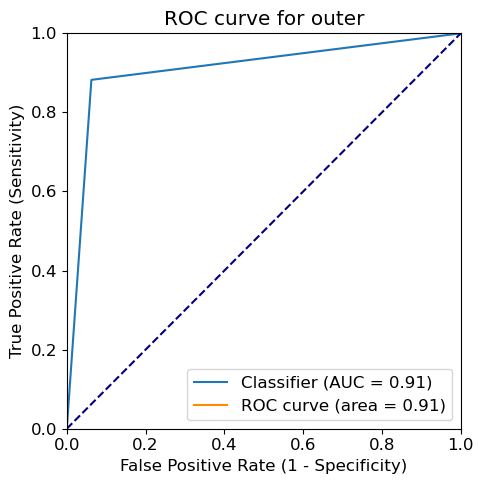

<Figure size 200x200 with 0 Axes>

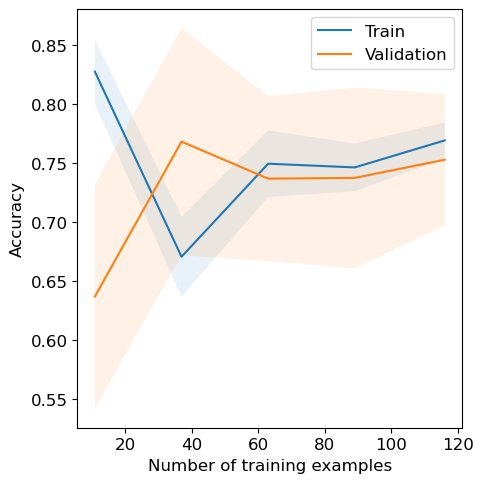

<Figure size 200x200 with 0 Axes>

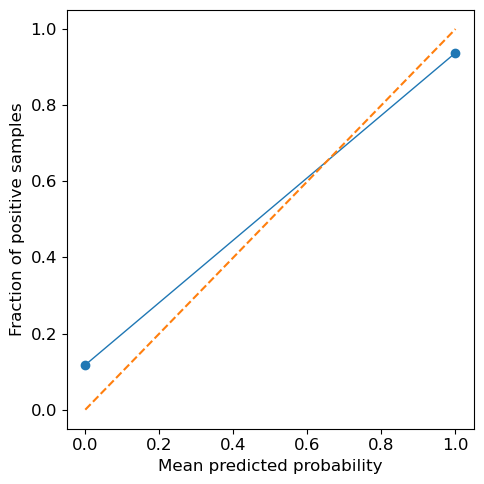

<Figure size 200x200 with 0 Axes>

In [29]:
outer_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)
scores = cross_val_score(best_modelNB, X_train_f,Y_train_f, cv=outer_cv, scoring='roc_auc')
print("Nested Cross-Validation Scores:")
print(np.mean(scores))
X_test_f=result_test.iloc[:,:-1].values
Y_test_f=result_test["GS"].values
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize=(2, 2))
measure_critaria(best_modelNB,X_test_f,Y_test_f)
LearningCurve(best_modelNB,X_train_f,Y_train_f,10)
Calibration_Curve(best_modelNB,X_test_f,Y_test_f)

In [107]:
import shap
def SHAPMODELFORSUM (model,Xtrain):
    #explainer=shap.KernelExplainer(model.predict,Xtrain.iloc[:,:-1])
    #shap_values = explainer.shap_values(Xtrain.iloc[1:,:-1])
    explainer=shap.KernelExplainer(model.predict_proba,Xtrain)
    shap_values = explainer.shap_values(Xtrain)
    #explainer=shap.KernelExplainer(model.predict,Xtrain)
    #shap_values = explainer.shap_values(Xtrain)
    #col_feature=Xtrain.columns
    #shap.summary_plot(shap_values, Xtrain,feature_names=list(col_feature),color=plt.get_cmap("cool"))
    shap.summary_plot(shap_values, Xtrain, show=False)
    #exp = shap.Explanation(shap_values, explainer.expected_value,feature_names=list(col_feature))
    #shap.plots.waterfall(exp[1])
    #shap.plots.waterfall(exp[0])

In [99]:
def SHAPMODELFORWF (model,Xtrain):
    explainer=shap.KernelExplainer(model.predict,Xtrain)
    shap_values = explainer.shap_values(Xtrain)
    col_feature=Xtrain.columns
    shap.summary_plot(shap_values, Xtrain,feature_names=list(col_feature),color=plt.get_cmap("cool"))
    exp = shap.Explanation(shap_values, explainer.expected_value,feature_names=list(col_feature))
    plt.title("PFPS")
    shap.plots.waterfall(exp[1],max_display=16)
    plt.title(" non - PFPS")
    shap.plots.waterfall(exp[0],max_display=16)

#### GaussianNB

Using 129 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/129 [00:00<?, ?it/s]

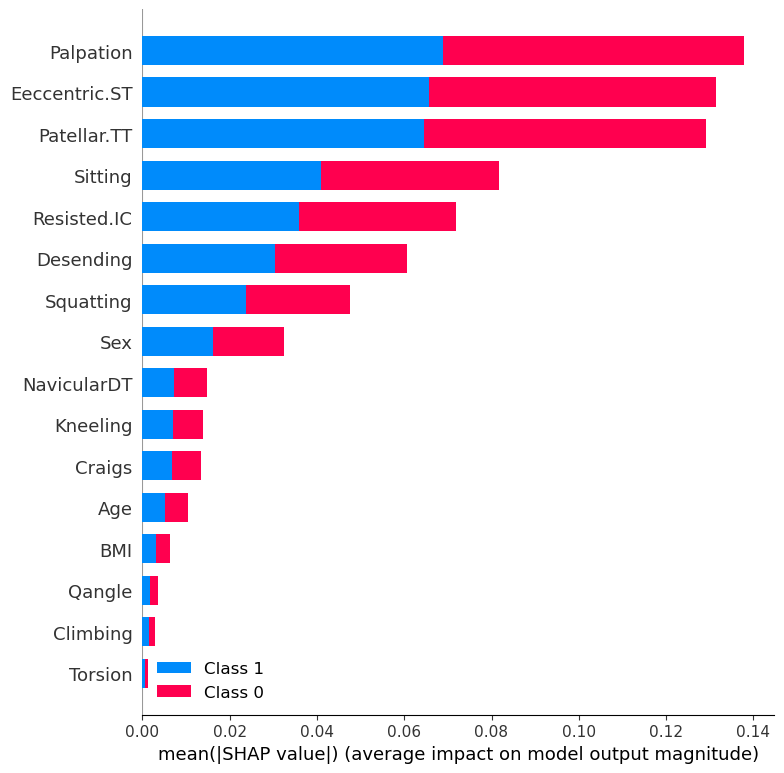

In [32]:
SHAPMODELFORSUM(best_modelNB,result_train.iloc[:,:-1])

Using 129 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/129 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


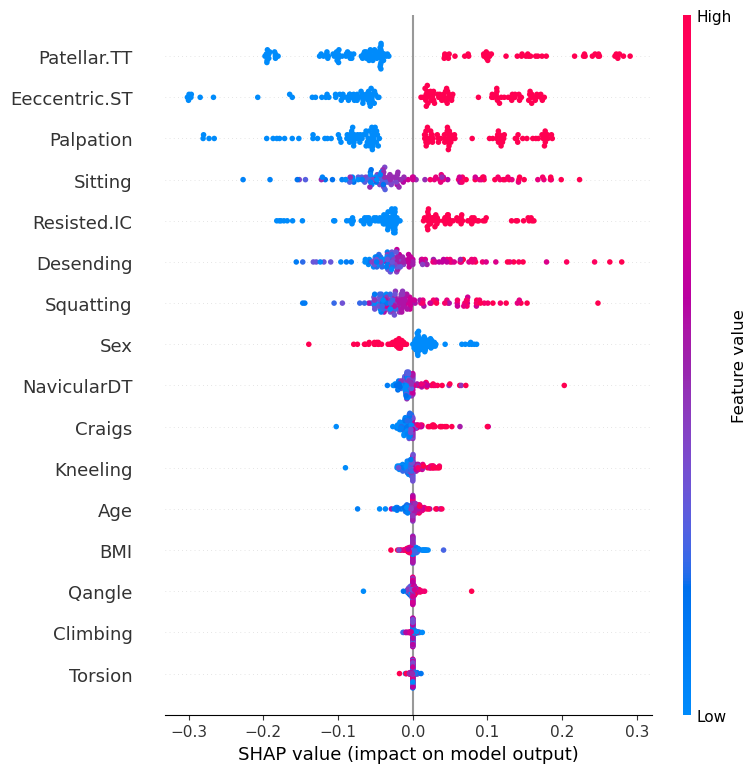

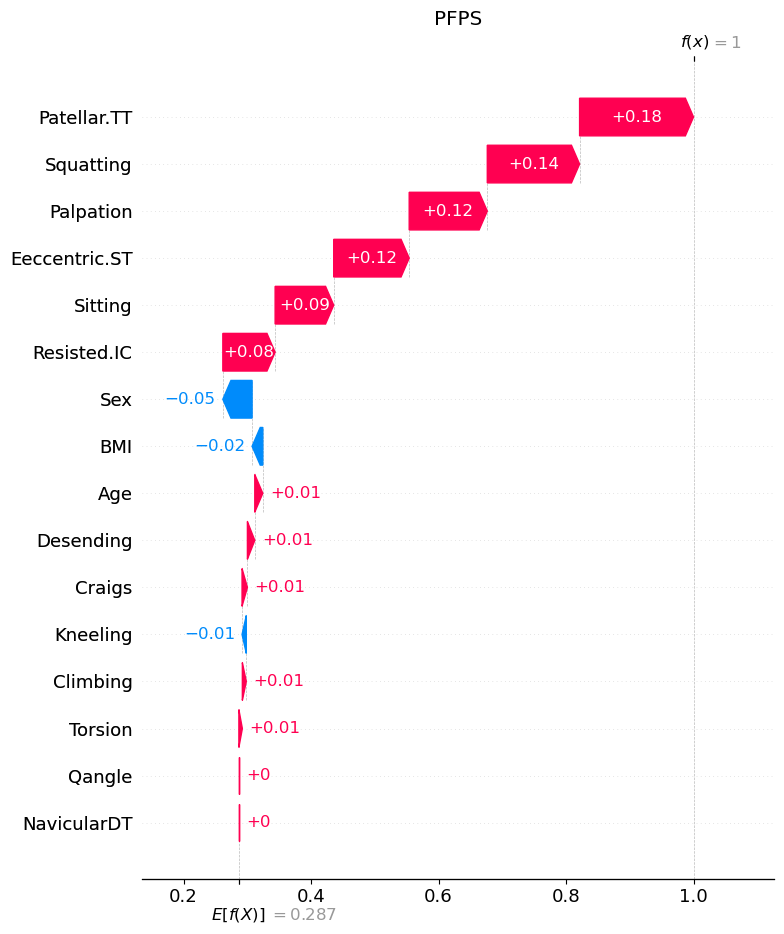

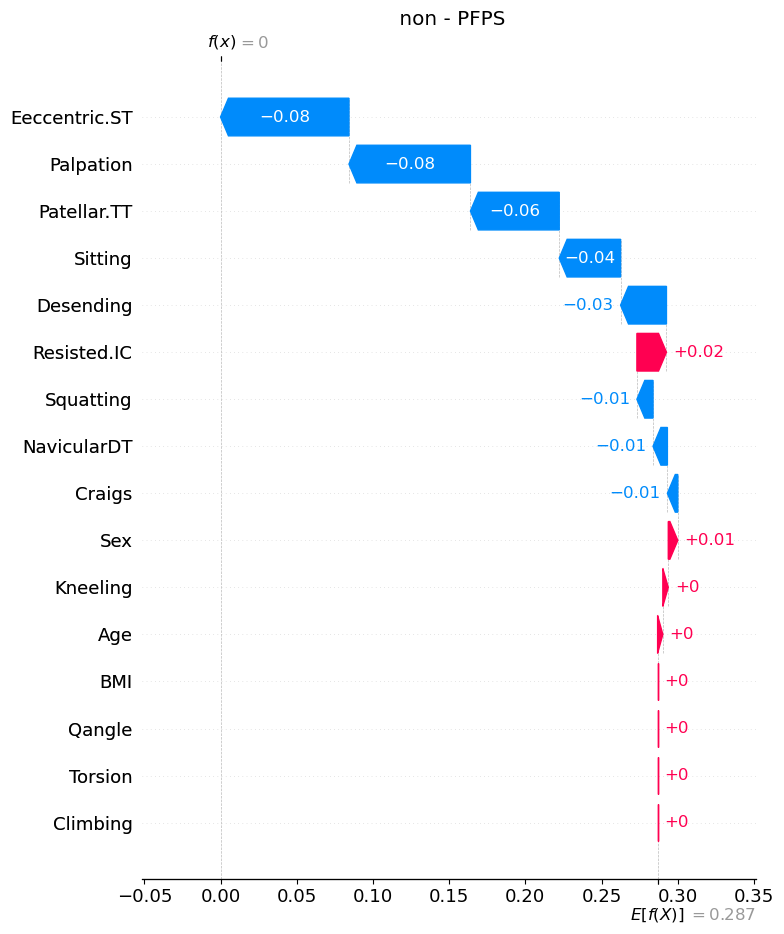

In [100]:
SHAPMODELFORWF(best_modelNB,result_train.iloc[:,:-1])

#### SHAP OF MLPClassifier

Using 129 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/129 [00:00<?, ?it/s]

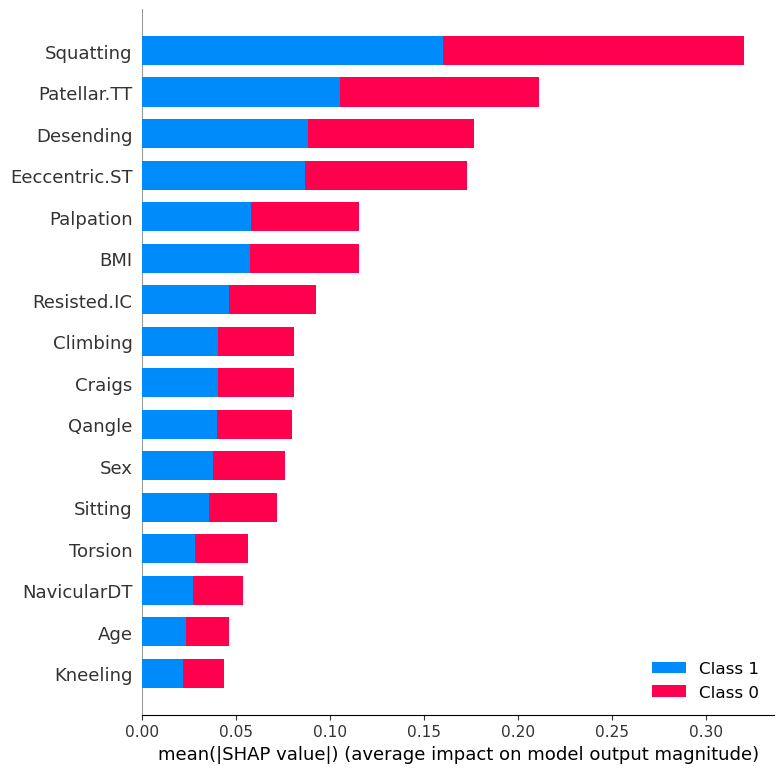

In [89]:
SHAPMODELFORSUM(modelMP,result_train.iloc[:,:-1])

Using 129 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/129 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


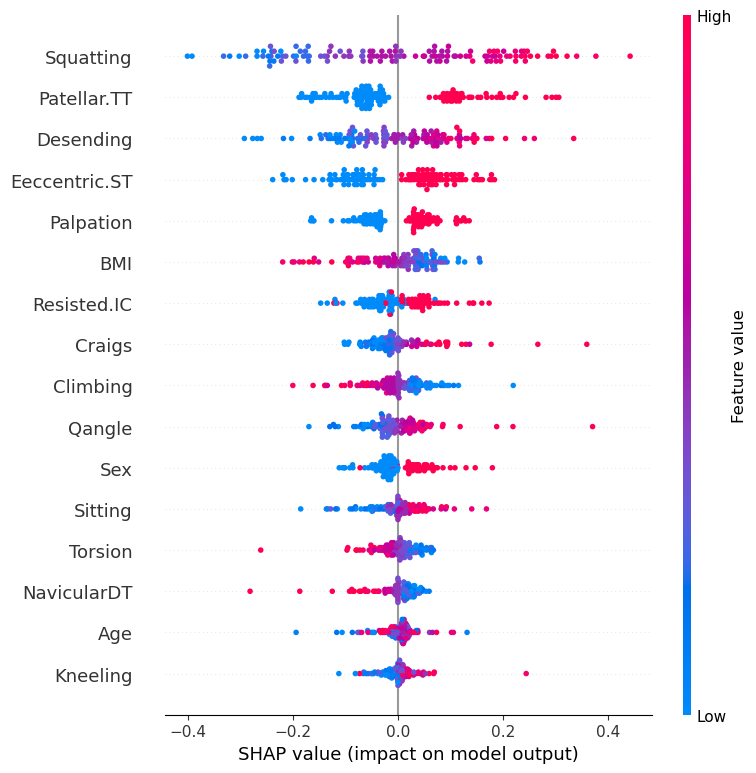

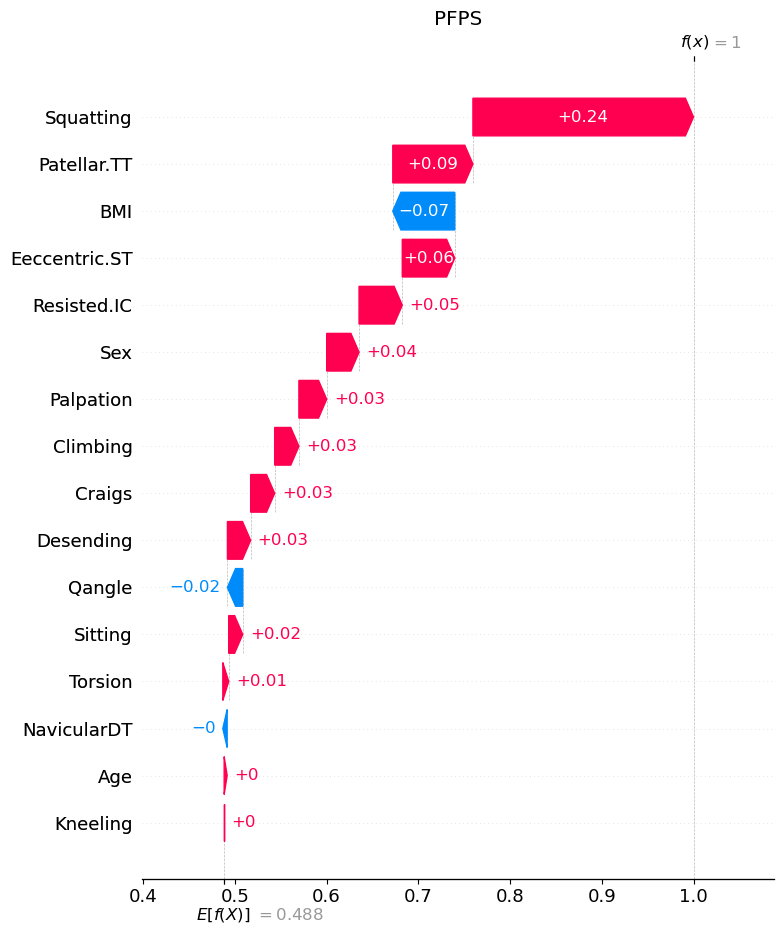

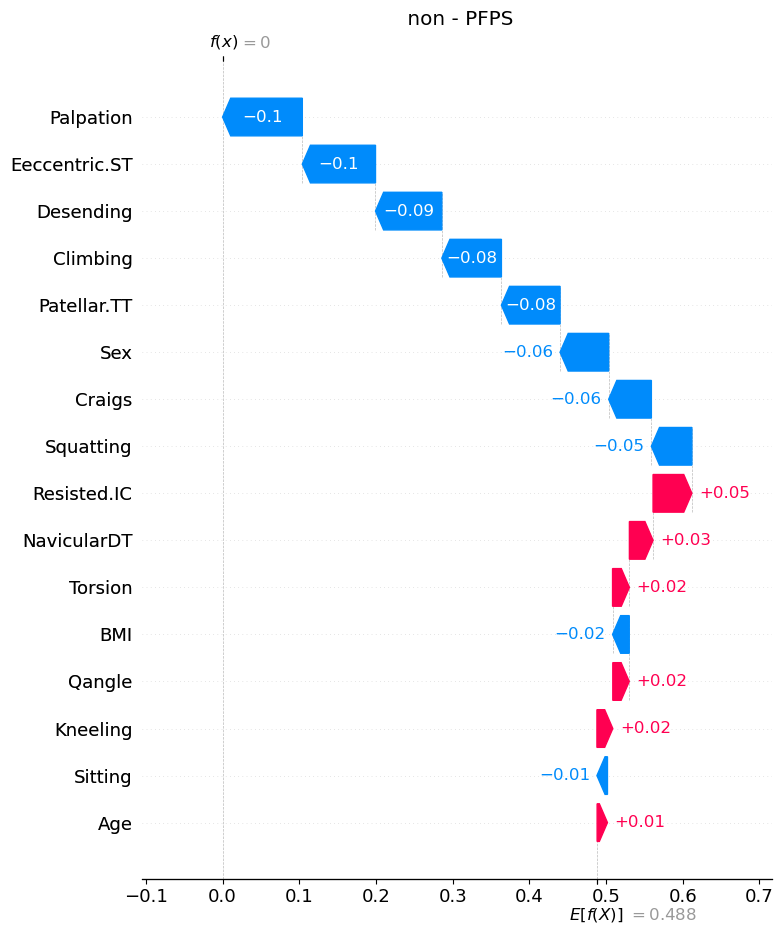

In [101]:
SHAPMODELFORWF(modelMP,result_train.iloc[:,:-1])

Using 129 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/129 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


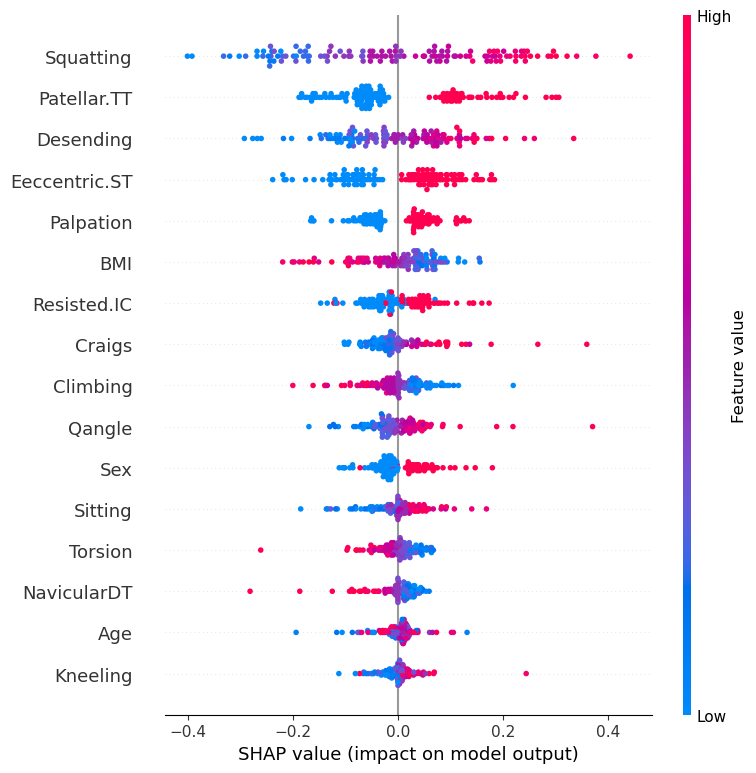

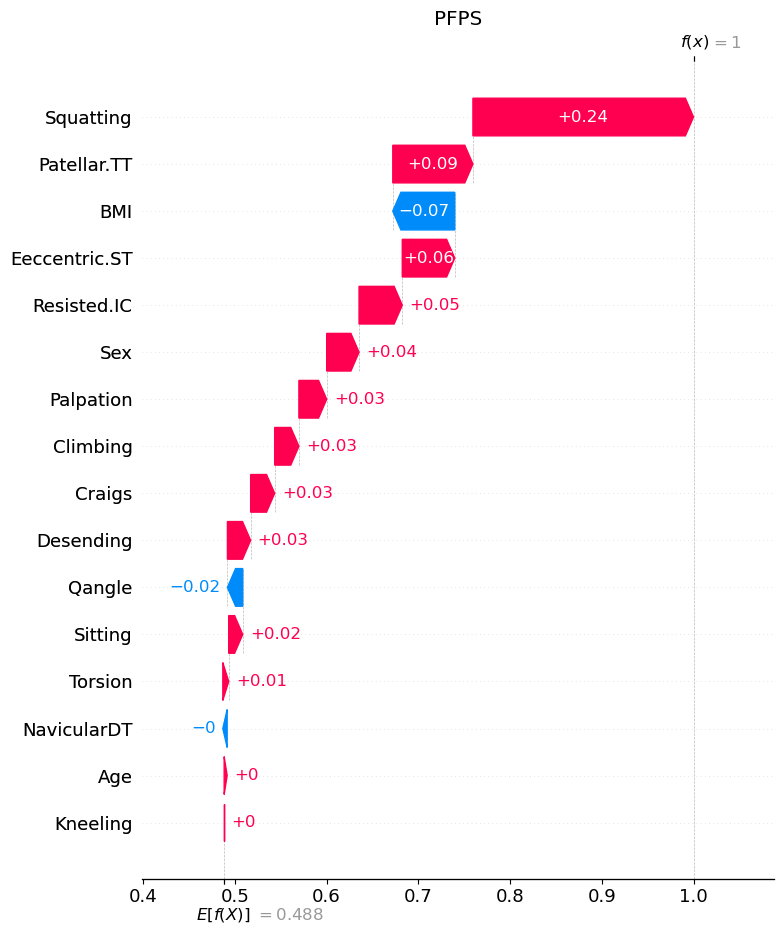

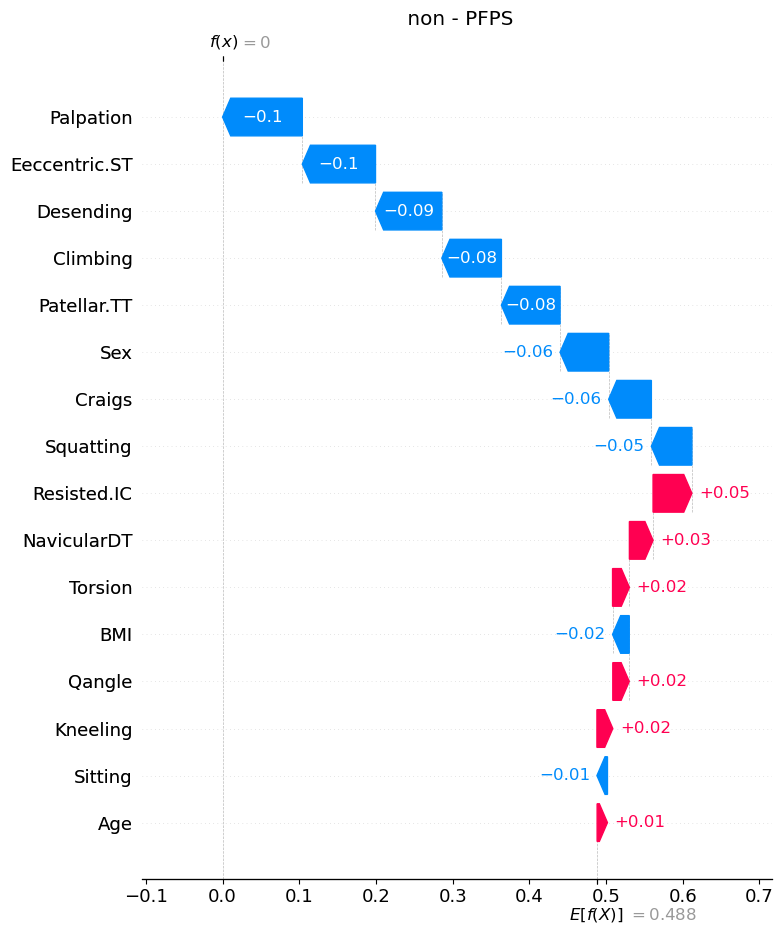

In [101]:
SHAPMODELFORWF(modelMP,result_train.iloc[:,:-1])

Using 129 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/129 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


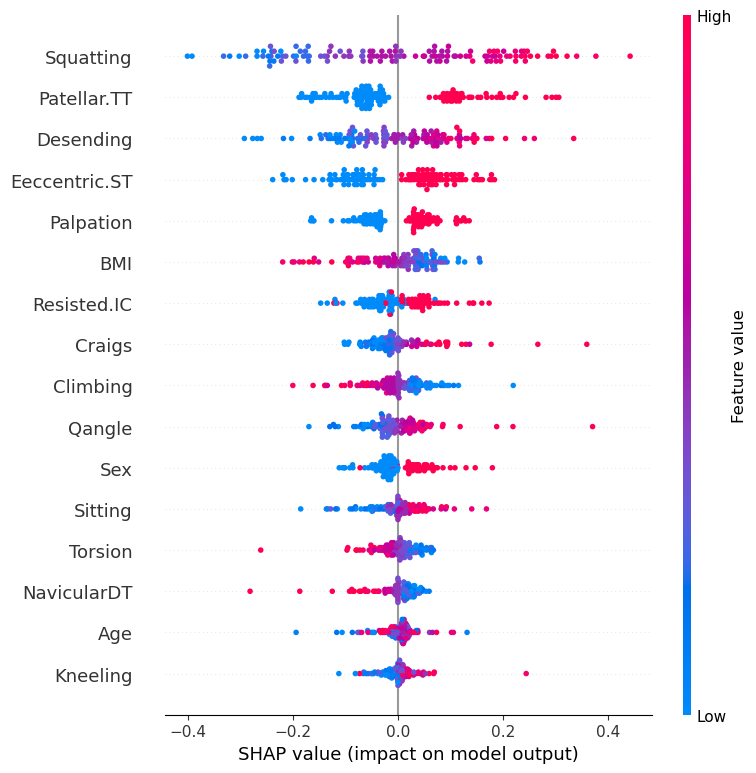

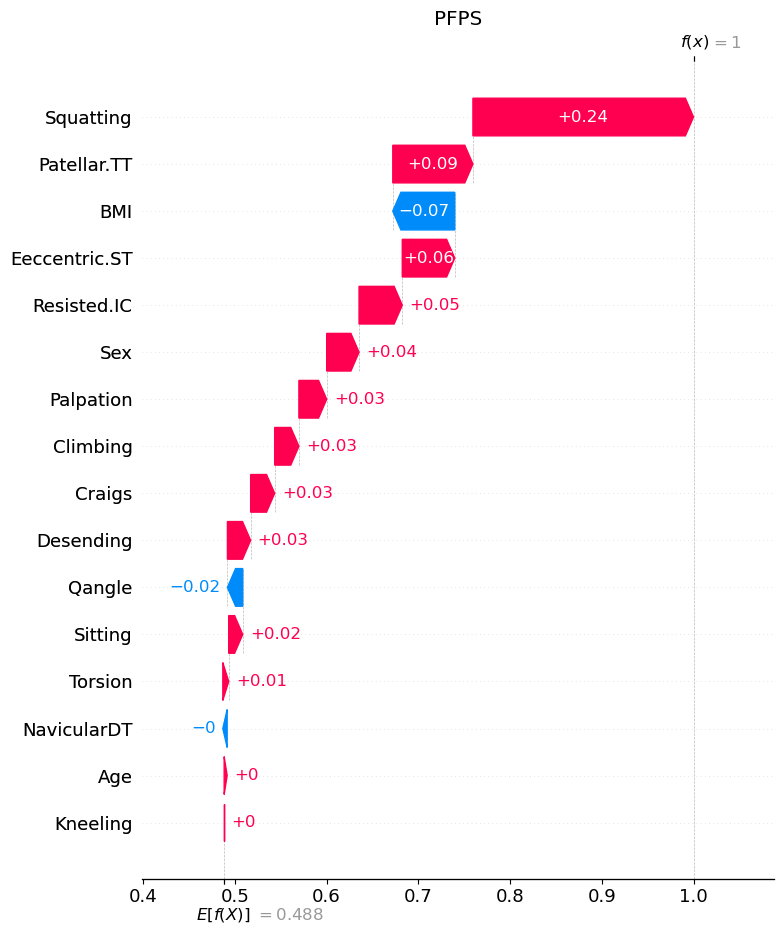

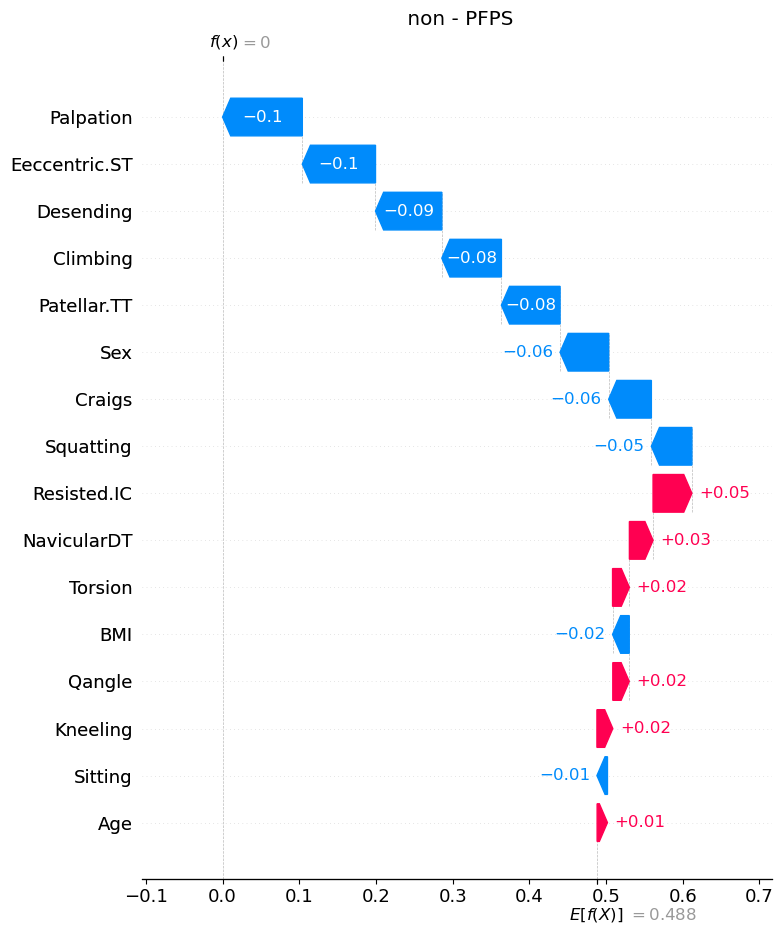

In [101]:
SHAPMODELFORWF(modelMP,result_train.iloc[:,:-1])

#### DecisionTreeClassifier

In [36]:
#SHAPMODEL(best_modelDT,result_train)

Using 129 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/129 [00:00<?, ?it/s]

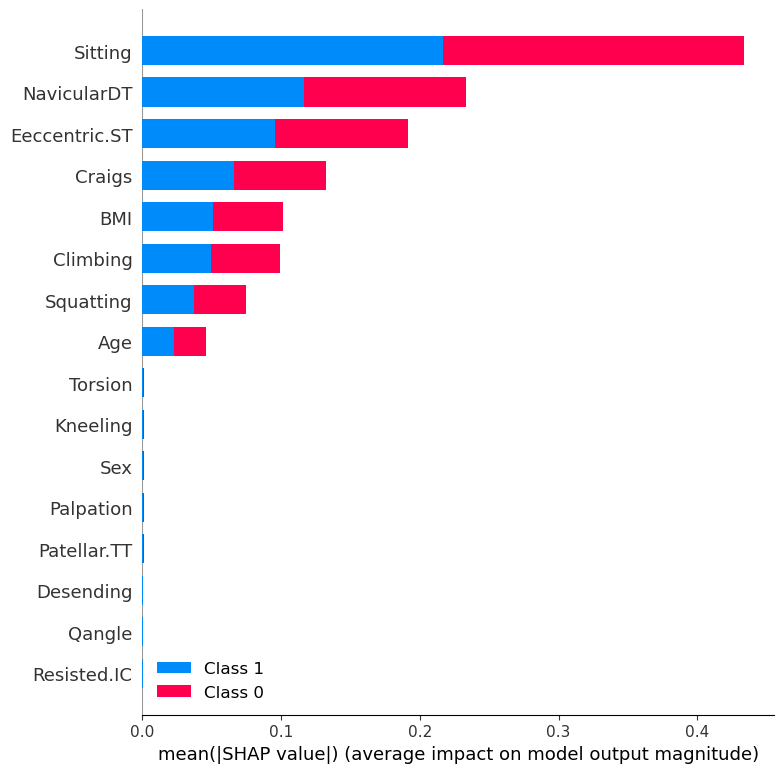

In [91]:
SHAPMODELFORSUM(best_modelDT,result_train.iloc[:,:-1])

Using 129 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/129 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


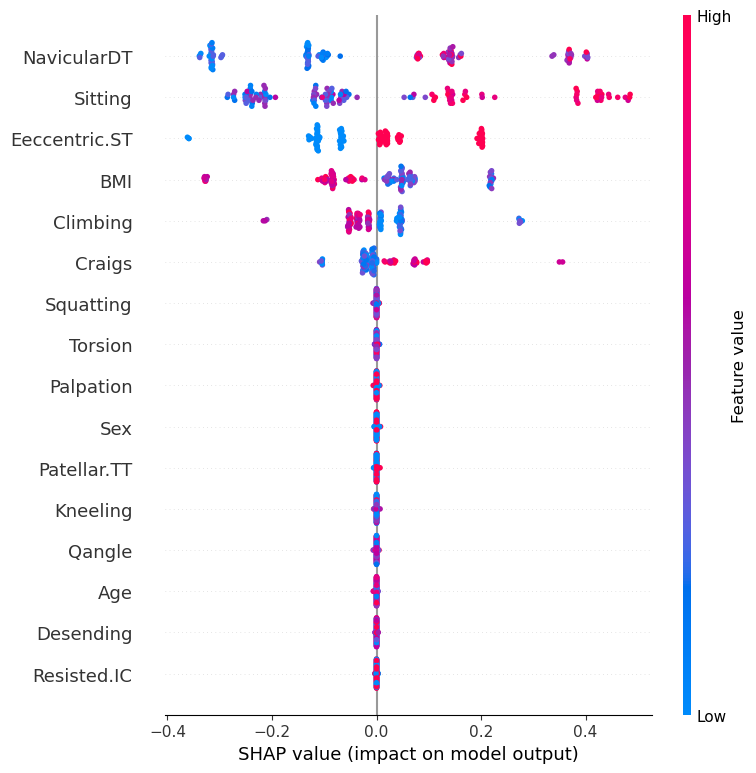

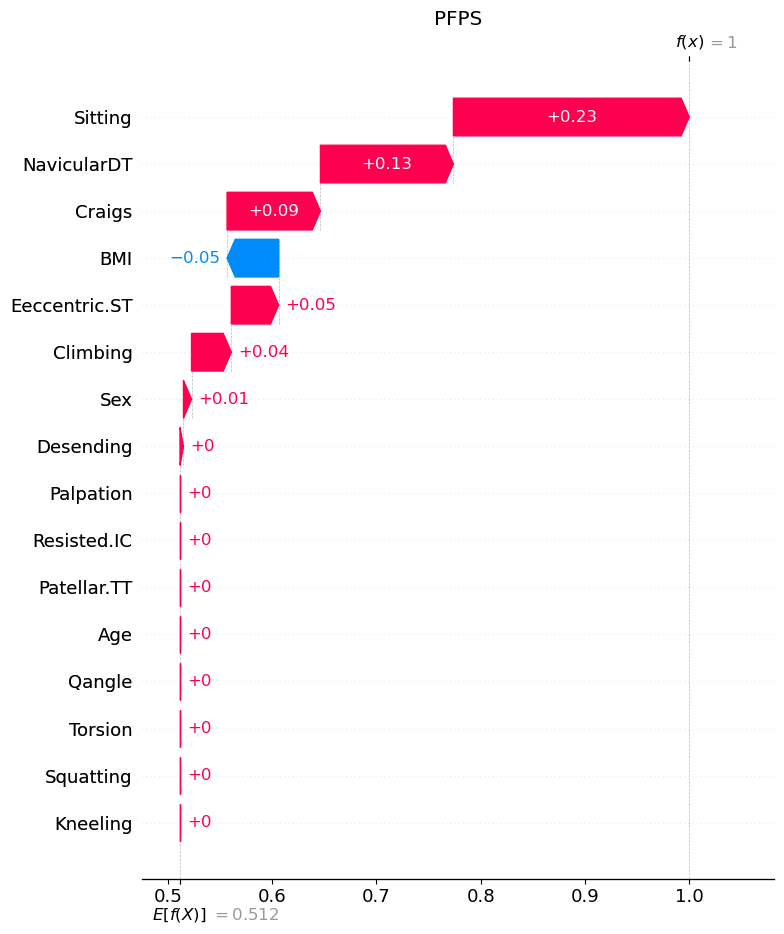

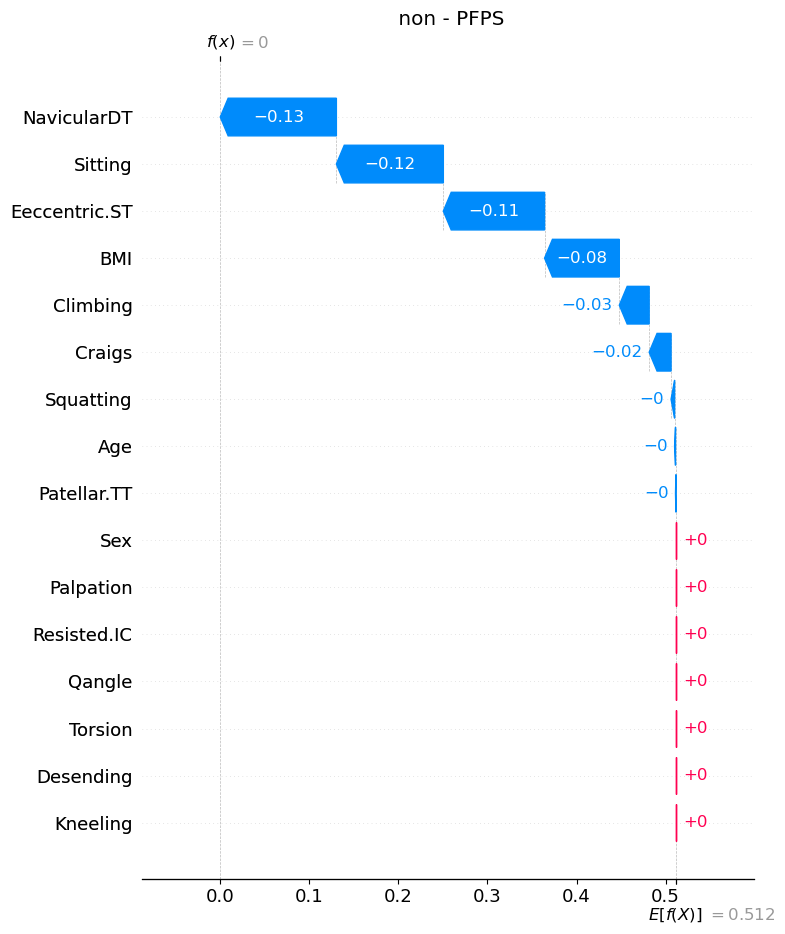

In [108]:
SHAPMODELFORWF(best_modelDT,result_train.iloc[:,:-1])

In [39]:
#SHAPMODEL(best_modelSVM,result_train)

Using 129 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/129 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


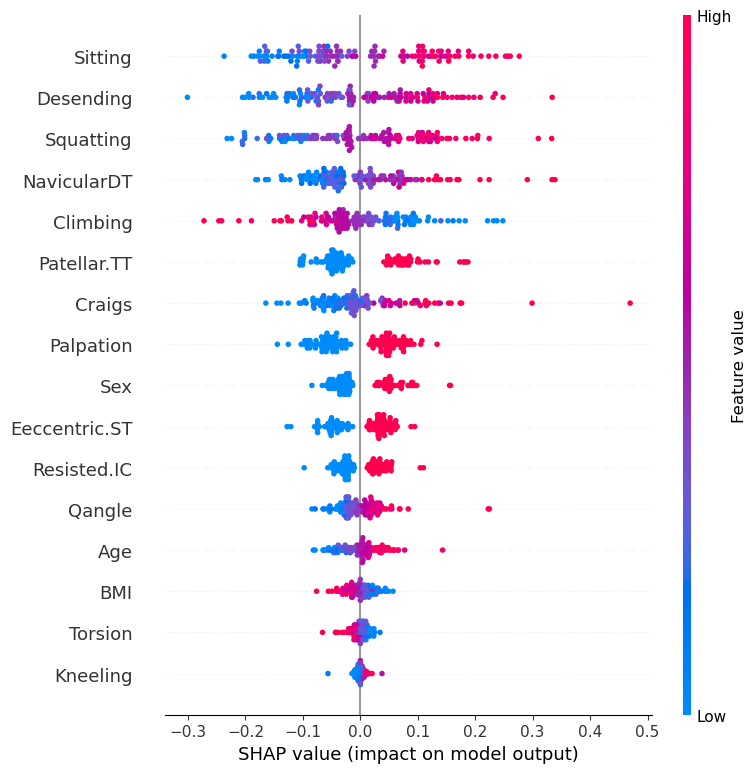

In [104]:
SHAPMODELFORSUM(best_modelSVM,result_train.iloc[:,:-1])

Using 129 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/129 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


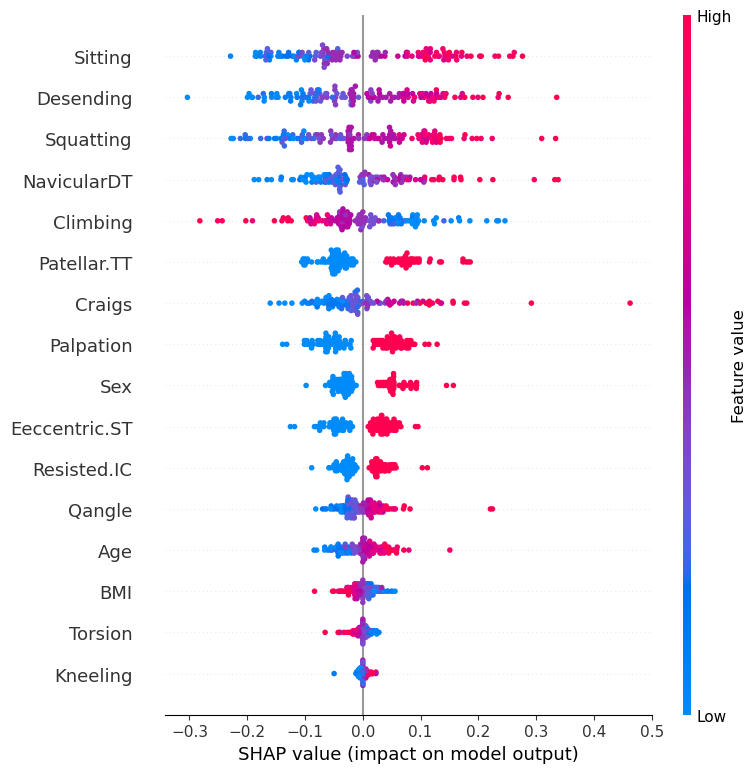

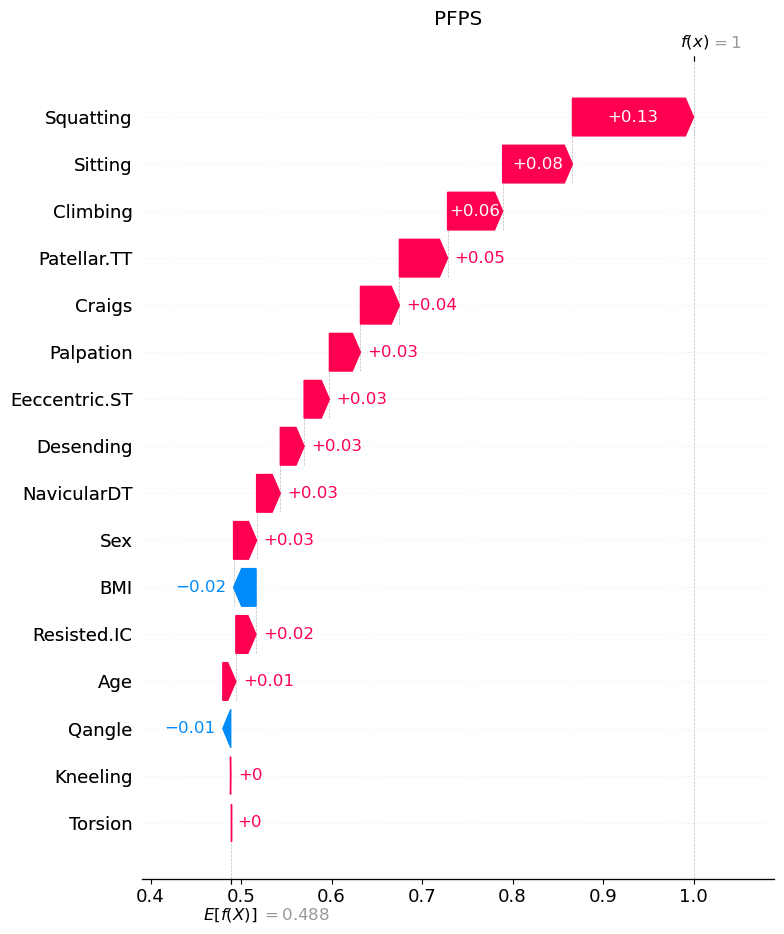

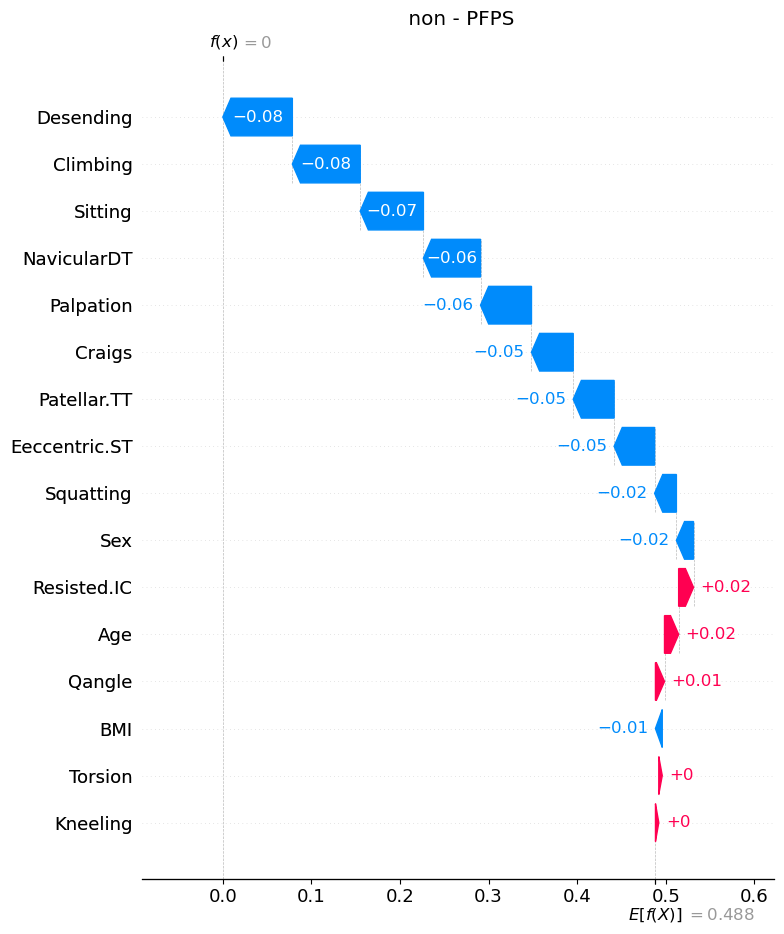

In [105]:
SHAPMODELFORWF(best_modelSVM,result_train.iloc[:,:-1])